In [1]:
import numpy as np
from scipy.misc import imread as im
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import confusion_matrix as CM
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
import os
from collections import Counter
%matplotlib inline

# Outlier Detection

In [7]:
## edit this to the result folder
folder = "/".join([os.getcwd(),"OutlierDetectionResult"])
print folder
lam_list = sorted(map(lambda x: float(x[3:]), filter(lambda x: 'lam' in x, os.listdir(folder))))
print lam_list

/home/czhou2/remoteJupyter/RobustAutoencoder/OutlierDetectionResult
[1e-05, 5e-05, 8e-05, 0.0001, 0.0003, 0.0005, 0.00055, 0.0006, 0.00065, 0.0007, 0.00075, 0.0008, 0.001, 0.0015]


In [10]:
y = np.load(r"./data/y.npk")
stat = Counter(y)
print "number of majority:", stat[4]
print "number of outlier:", len(y) - stat[4]
print "outlier ratio:", (len(y) - stat[4])/float(stat[4])

number of majority: 4859
number of outlier: 265
outlier ratio: 0.0545379707759


In [11]:
def binary_error(value):
    if value == 0.0:
        return "m" # 'majority'
    else:
        return "o" #'outlier'
    
def binary_y(value):
    if value == 4:
        return "m"
    else:
        return "o"

bi_y = map(binary_y,y)
print Counter(bi_y)

Counter({'m': 4859, 'o': 265})


In [15]:
precisions=[]
lams=[]
recalls=[]
f1s = []
for i,lam in enumerate(lam_list):
    S = np.load(folder + "/" + "lam" + str(lam) + "/" + r"l21S.npk")    
    predictions = map(binary_error,np.linalg.norm(S,axis = 1))
    print "lambda:", lam
    print "precision",precision(bi_y,predictions,labels=["o","m"],pos_label="o")
    print "recall",recall(bi_y,predictions,labels=["o","m"],pos_label="o")
    print "f1",f1_score(bi_y,predictions,labels=["o","m"],pos_label="o")
    lams.append(lam)
    precisions.append(precision(bi_y,predictions,labels=["o","m"],pos_label="o"))
    recalls.append(recall(bi_y,predictions,labels=["o","m"],pos_label="o"))
    f1s.append(f1_score(bi_y,predictions,labels=["o","m"],pos_label="o"))
#     print CM(bi_y,predictions)
    print "------------"
print len(lams),len(recalls),len(f1s),len(precisions)

lambda: 1e-05
precision 0.0517174082748
recall 1.0
f1 0.09834848766
------------
lambda: 5e-05
precision 0.0517174082748
recall 1.0
f1 0.09834848766
------------
lambda: 8e-05
precision 0.0517174082748
recall 1.0
f1 0.09834848766
------------
lambda: 0.0001
precision 0.0517174082748
recall 1.0
f1 0.09834848766
------------
lambda: 0.0003
precision 0.0517174082748
recall 1.0
f1 0.09834848766
------------
lambda: 0.0005
precision 0.0517174082748
recall 1.0
f1 0.09834848766
------------
lambda: 0.00055
precision 0.0517174082748
recall 1.0
f1 0.09834848766
------------
lambda: 0.0006
precision 0.0517174082748
recall 1.0
f1 0.09834848766
------------
lambda: 0.00065
precision 0.0517174082748
recall 1.0
f1 0.09834848766
------------
lambda: 0.0007
precision 0.0517174082748
recall 1.0
f1 0.09834848766
------------
lambda: 0.00075
precision 0.0517174082748
recall 1.0
f1 0.09834848766
------------
lambda: 0.0008
precision 0.0517174082748
recall 1.0
f1 0.09834848766
------------
lambda: 0.001
pr

In [ ]:
plt.figure(figsize=(6.5,4.5))
plt.xlabel("Lambdas")
plt.ylabel("Values")
plt.plot(range(14),f1s,color='r',label="f1")
plt.plot(range(14),precisions,color="b",label="precision")
plt.plot(range(14),recalls,color="g",label="recall")
plt.legend(["f1","precision","recall"],loc='best')
plt.xticks(range(14), lam_list,rotation='vertical')
plt.title("Anomalies Detection of $l_{2,1}$ Robust Auto-encoder")
plt.show()

In [7]:
def binary_error(value):
    if value == 0.0:
        return "m" # 'm' for the majority
    else:
        return "o" # 'o' for the outlier
    
def binary_y(value):
    if value == 4:
        return "m"
    else:
        return "o"

bi_y = map(binary_y,y)
print Counter(bi_y)

for i,lam in enumerate(lam_list):
    S = np.load(folder + "\\" + "lam" + lam + "\\" + r"l21S.pkl")    
    predictions = map(binary_error,np.linalg.norm(S,axis = 1))
    print "lambda:", lam
    print "precision",precision(bi_y,predictions,labels=["o","m"],pos_label="o")
    print "recall",recall(bi_y,predictions,labels=["o","m"],pos_label="o")
    print "f1",f1_score(bi_y,predictions,labels=["o","m"],pos_label="o")
    lams.append(lam)
    precisions.append(precision(bi_y,predictions,labels=["o","m"],pos_label="o"))
    recalls.append(recall(bi_y,predictions,labels=["o","m"],pos_label="o"))
    f1s.append(f1_score(bi_y,predictions,labels=["o","m"],pos_label="o"))
    print CM(bi_y,predictions)
    print "------------"

Counter({'m': 4859, 'o': 265})
lambda: 0.0005
precision 0.189526184539
recall 0.860377358491
f1 0.310626702997
[[3884  975]
 [  37  228]]
------------
lambda: 0.00055
precision 0.300140252454
recall 0.807547169811
f1 0.437627811861
[[4360  499]
 [  51  214]]
------------
lambda: 0.0006
precision 0.442477876106
recall 0.754716981132
f1 0.557880055788
[[4607  252]
 [  65  200]]
------------
lambda: 0.00065
precision 0.608108108108
recall 0.679245283019
f1 0.641711229947
[[4743  116]
 [  85  180]]
------------
lambda: 0.0007
precision 0.716981132075
recall 0.57358490566
f1 0.637316561845
[[4799   60]
 [ 113  152]]
------------
lambda: 0.00075
precision 0.791139240506
recall 0.471698113208
f1 0.591016548463
[[4826   33]
 [ 140  125]]
------------


In [8]:
print len(lams),len(recalls),len(f1s),len(precisions)

14 14 14 14


In [9]:
import pandas as pd
d = {"lambda":map(float,lams),"precision":precisions,"recall":recalls,"f1":f1s}
data = pd.DataFrame(d)
print data

          f1   lambda  precision    recall
0   0.098348  0.00001   0.051717  1.000000
1   0.098348  0.00005   0.051717  1.000000
2   0.098348  0.00008   0.051717  1.000000
3   0.098348  0.00010   0.051717  1.000000
4   0.099774  0.00030   0.052506  1.000000
5   0.487535  0.00080   0.916667  0.332075
6   0.058608  0.00100   1.000000  0.030189
7   0.000000  0.00150   0.000000  0.000000
8   0.310627  0.00050   0.189526  0.860377
9   0.437628  0.00055   0.300140  0.807547
10  0.557880  0.00060   0.442478  0.754717
11  0.641711  0.00065   0.608108  0.679245
12  0.637317  0.00070   0.716981  0.573585
13  0.591017  0.00075   0.791139  0.471698


In [10]:
result = data.sort_values(by=["lambda"],ascending=True)
print result

          f1   lambda  precision    recall
0   0.098348  0.00001   0.051717  1.000000
1   0.098348  0.00005   0.051717  1.000000
2   0.098348  0.00008   0.051717  1.000000
3   0.098348  0.00010   0.051717  1.000000
4   0.099774  0.00030   0.052506  1.000000
8   0.310627  0.00050   0.189526  0.860377
9   0.437628  0.00055   0.300140  0.807547
10  0.557880  0.00060   0.442478  0.754717
11  0.641711  0.00065   0.608108  0.679245
12  0.637317  0.00070   0.716981  0.573585
13  0.591017  0.00075   0.791139  0.471698
5   0.487535  0.00080   0.916667  0.332075
6   0.058608  0.00100   1.000000  0.030189
7   0.000000  0.00150   0.000000  0.000000


In [162]:
folder = r"C:\Users\zc\Desktop\Result\2_7Outliers\4_with_other_Strans"
lam_list = map(str,sorted([0.00001,0.00005,0.00008,0.0001,0.0003,0.0008,0.001,0.0015]+
               [ 0.0005 ,  0.00055,  0.0006 ,  0.00065,  0.0007 ,  0.00075]))
print lam_list

['1e-05', '5e-05', '8e-05', '0.0001', '0.0003', '0.0005', '0.00055', '0.0006', '0.00065', '0.0007', '0.00075', '0.0008', '0.001', '0.0015']


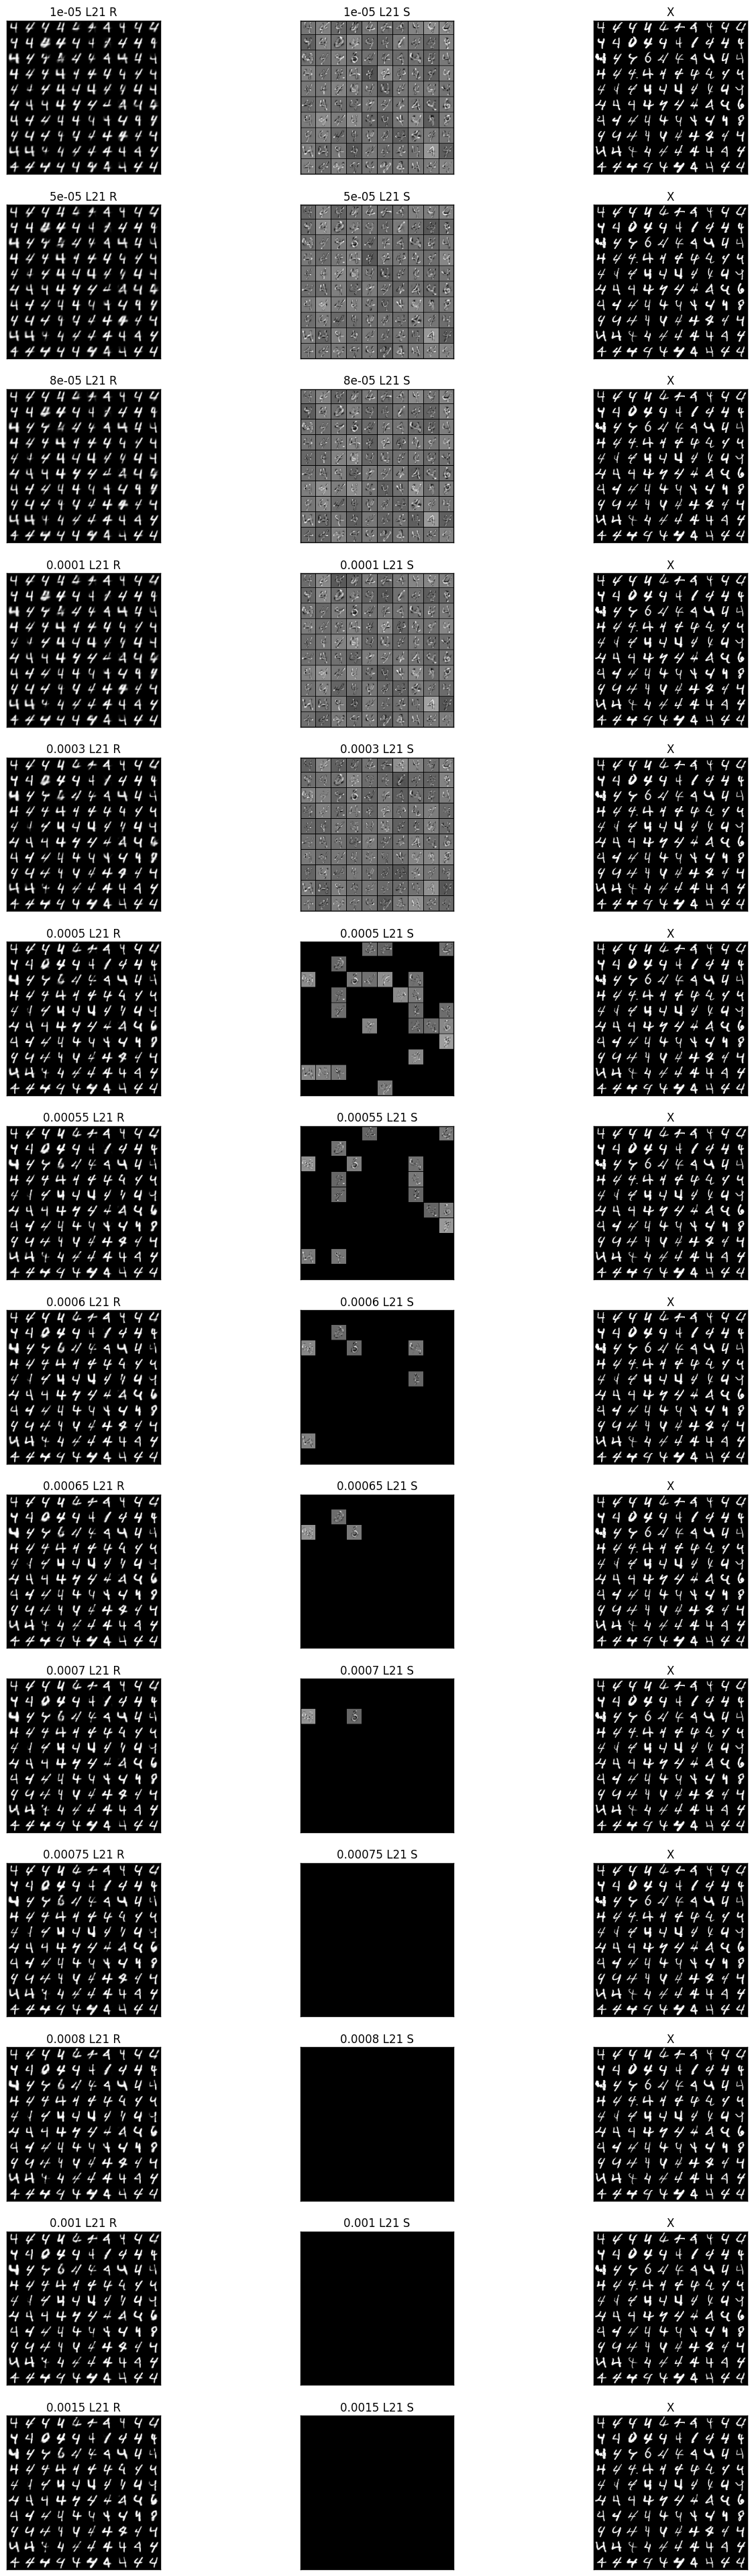

In [163]:
%matplotlib inline
ncol = 3
folder_cor = folder + "\\" ##+corruption_level_folder[-2]
fig,ax = plt.subplots(nrows=len(lam_list),ncols=ncol)
X = im(folder_cor + "\\" +r"X.png")
for index in range(len(lam_list)):
    #rR = im(folder_cor + "\\" + "lam" +lam_list[index]+ "\\" + r"rR.png")
    l21R = im(folder_cor + "\\" + "lam" +lam_list[index]+ "\\" + r"l21R.png")
    l21S = im(folder_cor + "\\" + "lam" +lam_list[index] + "\\" + r"l21S.png")
    #rS = im(folder_cor + "\\" + "lam" +lam_list[index] + "\\" + r"rS.png")
    
    ax[index][0].imshow(l21R,cmap = "gray")
    ax[index][1].imshow(l21S,cmap = "gray")
    ax[index][2].imshow(X,cmap = "gray")
    
    ax[index][0].set_title(lam_list[index]+r" L21 R")
    ax[index][1].set_title(lam_list[index]+r" L21 S")
    ax[index][2].set_title("X")
    ax[index][0].get_xaxis().set_visible(False)
    ax[index][0].get_yaxis().set_visible(False)
    ax[index][1].get_xaxis().set_visible(False)
    ax[index][1].get_yaxis().set_visible(False)
    ax[index][2].get_xaxis().set_visible(False)
    ax[index][2].get_yaxis().set_visible(False)
    
fig.set_size_inches(16,(len(lam_list))*3.5)
#fig.savefig(r"C:\Users\zc\Desktop\Result\Comparing.png",bbox_inches='tight')
plt.show()

In [13]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest

In [14]:
y_loc = r"C:\Users\zc\Documents\MNIST data\Tutorial\Four_with_other_p5_y.pkl"
x_loc = r"C:\Users\zc\Documents\MNIST data\Tutorial\Four_with_other_p5.pkl"
y = np.load(y_loc)
x = np.load(x_loc)
print Counter(y)
print len(y) - Counter(y)[4]
print x.shape

Counter({4: 4859, 0: 35, 7: 34, 9: 34, 2: 29, 5: 28, 6: 28, 8: 27, 1: 25, 3: 25})
265
(5124L, 784L)


In [15]:
fractions = np.arange(0.01,0.7,0.02)
y_preds = []
for fraction in fractions:
    #model = EllipticEnvelope(contamination = fraction)
    model = IsolationForest(n_estimators=100,contamination=fraction,n_jobs=4)
    model.fit(x)
    y_pred = model.predict(x)
    y_preds.append(y_pred)

In [18]:
for i in y_preds:
    print Counter(i)

Counter({1: 5072, -1: 52})
Counter({1: 4970, -1: 154})
Counter({1: 4867, -1: 257})
Counter({1: 4765, -1: 359})
Counter({1: 4662, -1: 462})
Counter({1: 4560, -1: 564})
Counter({1: 4458, -1: 666})
Counter({1: 4355, -1: 769})
Counter({1: 4253, -1: 871})
Counter({1: 4150, -1: 974})
Counter({1: 4048, -1: 1076})
Counter({1: 3945, -1: 1179})
Counter({1: 3843, -1: 1281})
Counter({1: 3740, -1: 1384})
Counter({1: 3638, -1: 1486})
Counter({1: 3535, -1: 1589})
Counter({1: 3433, -1: 1691})
Counter({1: 3330, -1: 1794})
Counter({1: 3228, -1: 1896})
Counter({1: 3126, -1: 1998})
Counter({1: 3023, -1: 2101})
Counter({1: 2921, -1: 2203})
Counter({1: 2818, -1: 2306})
Counter({1: 2716, -1: 2408})
Counter({1: 2613, -1: 2511})
Counter({-1: 2613, 1: 2511})
Counter({-1: 2716, 1: 2408})
Counter({-1: 2818, 1: 2306})
Counter({-1: 2921, 1: 2203})
Counter({-1: 3023, 1: 2101})
Counter({-1: 3126, 1: 1998})
Counter({-1: 3228, 1: 1896})
Counter({-1: 3330, 1: 1794})
Counter({-1: 3433, 1: 1691})
Counter({-1: 3535, 1: 158

In [19]:
precisions=[]
fraction_list=[]
recalls=[]
f1s = []

def binary_y(value):
    if value == 4:
        return 1
    else:
        return -1
bi_y = map(binary_y,y)
for fraction,predictions in zip(fractions,y_preds):
    print "fraction",fraction
    print "precision",precision(bi_y,predictions,labels=[1,-1],pos_label=-1)
    print "recall",recall(bi_y,predictions,labels=[1,-1],pos_label=-1)
    print "f1",f1_score(bi_y,predictions,labels=[1,-1],pos_label=-1)
    fraction_list.append(fraction)
    precisions.append(precision(bi_y,predictions,labels=[1,-1],pos_label=-1))
    recalls.append(recall(bi_y,predictions,labels=[1,-1],pos_label=-1))
    f1s.append(f1_score(bi_y,predictions,labels=[1,-1],pos_label=-1))

    print CM(bi_y,predictions)
    print "------------"

fraction 0.01
precision 0.653846153846
recall 0.128301886792
f1 0.214511041009
[[  34  231]
 [  18 4841]]
------------
fraction 0.03
precision 0.448051948052
recall 0.260377358491
f1 0.329355608592
[[  69  196]
 [  85 4774]]
------------
fraction 0.05
precision 0.330739299611
recall 0.320754716981
f1 0.325670498084
[[  85  180]
 [ 172 4687]]
------------
fraction 0.07
precision 0.286908077994
recall 0.388679245283
f1 0.330128205128
[[ 103  162]
 [ 256 4603]]
------------
fraction 0.09
precision 0.268398268398
recall 0.467924528302
f1 0.341127922971
[[ 124  141]
 [ 338 4521]]
------------
fraction 0.11
precision 0.269503546099
recall 0.57358490566
f1 0.366706875754
[[ 152  113]
 [ 412 4447]]
------------
fraction 0.13
precision 0.222222222222
recall 0.558490566038
f1 0.317937701396
[[ 148  117]
 [ 518 4341]]
------------
fraction 0.15
precision 0.213263979194
recall 0.618867924528
f1 0.317214700193
[[ 164  101]
 [ 605 4254]]
------------
fraction 0.17
precision 0.198622273249
recall 0.6

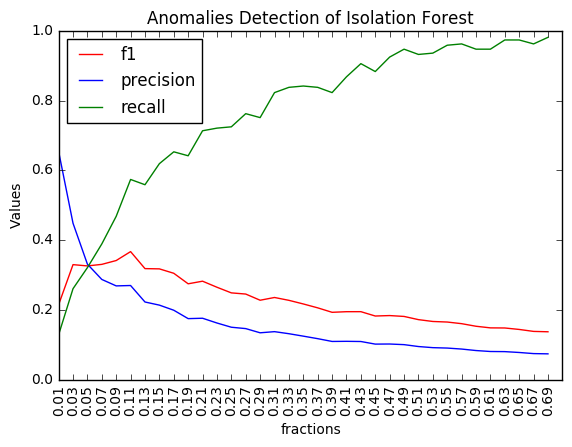

In [20]:
plt.figure(figsize=(6.5,4.5))
plt.xlabel("fractions")
plt.ylabel("Values")
plt.plot(range(len(fraction_list)),f1s,color='r',label="f1")
plt.plot(range(len(fraction_list)),precisions,color="b",label="precision")
plt.plot(range(len(fraction_list)),recalls,color="g",label="recall")
plt.legend(["f1","precision","recall"],loc='best')
plt.xticks(range(len(fraction_list)), fraction_list,rotation='vertical')
plt.title("Anomalies Detection of Isolation Forest")
plt.show()

In [53]:
from sklearn.svm import OneClassSVM

In [54]:
fractions = np.arange(0.01,0.7,0.02)
y_preds = []
for fraction in fractions:
    #model = EllipticEnvelope(contamination = fraction)
    model = OneClassSVM(nu=fraction)
    model.fit(x)
    y_pred = model.predict(x)
    y_preds.append(y_pred)

In [55]:
precisions=[]
fraction_list=[]
recalls=[]
f1s = []

def binary_y(value):
    if value == 4:
        return 1
    else:
        return -1
bi_y = map(binary_y,y)
for fraction,predictions in zip(fractions,y_preds):
    print "fraction",fraction
    print "precision",precision(bi_y,predictions,labels=[1,-1],pos_label=-1)
    print "recall",recall(bi_y,predictions,labels=[1,-1],pos_label=-1)
    print "f1",f1_score(bi_y,predictions,labels=[1,-1],pos_label=-1)
    fraction_list.append(fraction)
    precisions.append(precision(bi_y,predictions,labels=[1,-1],pos_label=-1))
    recalls.append(recall(bi_y,predictions,labels=[1,-1],pos_label=-1))
    f1s.append(f1_score(bi_y,predictions,labels=[1,-1],pos_label=-1))

    print CM(bi_y,predictions)
    print "------------"


fraction 0.01
precision 0.5625
recall 0.101886792453
f1 0.172523961661
[[  27  238]
 [  21 4838]]
------------
fraction 0.03
precision 0.487012987013
recall 0.283018867925
f1 0.35799522673
[[  75  190]
 [  79 4780]]
------------
fraction 0.05
precision 0.431906614786
recall 0.418867924528
f1 0.425287356322
[[ 111  154]
 [ 146 4713]]
------------
fraction 0.07
precision 0.387640449438
recall 0.520754716981
f1 0.444444444444
[[ 138  127]
 [ 218 4641]]
------------
fraction 0.09
precision 0.353448275862
recall 0.618867924528
f1 0.449931412894
[[ 164  101]
 [ 300 4559]]
------------
fraction 0.11
precision 0.3074204947
recall 0.656603773585
f1 0.418772563177
[[ 174   91]
 [ 392 4467]]
------------
fraction 0.13
precision 0.279104477612
recall 0.705660377358
f1 0.4
[[ 187   78]
 [ 483 4376]]
------------
fraction 0.15
precision 0.259452411995
recall 0.750943396226
f1 0.385658914729
[[ 199   66]
 [ 568 4291]]
------------
fraction 0.17
precision 0.239954075775
recall 0.788679245283
f1 0.3679

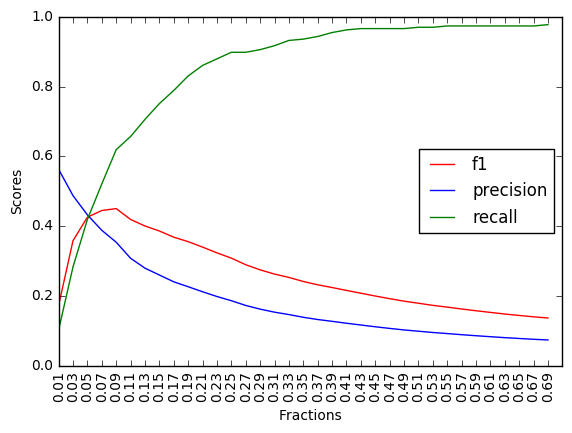

In [57]:
plt.figure(figsize=(6.5,4.5))
plt.xlabel("Fractions")
plt.ylabel("Scores")
plt.plot(range(len(fraction_list)),f1s,color='r',label="f1")
plt.plot(range(len(fraction_list)),precisions,color="b",label="precision")
plt.plot(range(len(fraction_list)),recalls,color="g",label="recall")
plt.legend(["f1","precision","recall"],loc='best')
plt.xticks(range(len(fraction_list)), fraction_list,rotation='vertical')
plt.show()